# Linear polymerization

This example demonstrates a simple polymerization process in which monomers `M` can bind each other to form linear chains.
There's a lower rate of depolymerization, and chains can be terminated by capping agents `C`.

In [1]:
import random
random.seed(42)

In [2]:
from kappybara.system import System

system = System.from_ka(
    """
    %init: 1000 M(l[.], r[.])

    %obs: 'Free monomer' |M(l[.], r[.])|

    M(r[.]), M(l[.]) -> M(r[1]), M(l[1]) @ 1  // Polymerization
    M(r[1]), M(l[1]) -> M(r[.]), M(l[.]) @ 0.1  // Depolymerization
    
    // Chain capping
    M(r[.]), C(m[.]) -> M(r[1]), C(m[1]) @ 0.05
    M(l[.]), C(m[.]) -> M(l[1]), C(m[1]) @ 0.05
    
    // Cap removal
    M(r[1]), C(m[1]) -> M(r[.]), C(m[.]) @ 0.01
    M(l[1]), C(m[1]) -> M(l[.]), C(m[.]) @ 0.01
    """
)

Simulate for a bit:

In [3]:
while system.time < 100:
    system.update()

KeyError: 'r'

Free monomers: 1000


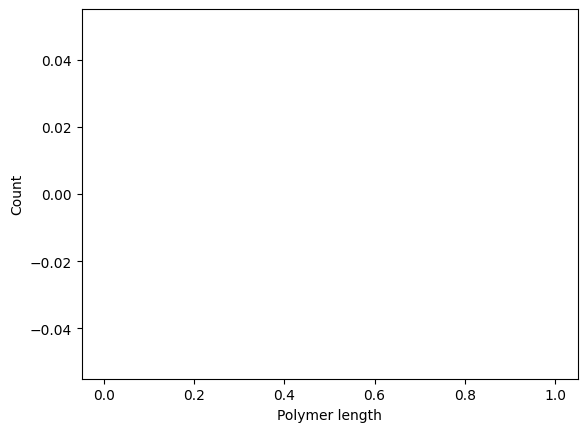

In [4]:
import matplotlib.pyplot as plt

def polymer_len_plot(system):
    plt.hist([len(component) for component in system.mixture if len(component) > 1])
    plt.xlabel("Polymer length")
    plt.ylabel("Count");

print(f"Free monomers: {system['Free monomer']}")
polymer_len_plot(system)

Now let's add some of the capping agent:

In [5]:
system.mixture.instantiate("C(m[.])", 500)

while system.time < 200:
    system.update()

print(f"Free monomers: {system['Free monomer']}")
polymer_len_plot(system)

KeyError: 'r'